Saving logistic.csv to logistic (5).csv
Optimization terminated successfully.
         Current function value: 0.354485
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Pass             Pseudo R-squared: 0.485     
Date:               2023-10-15 18:57 AIC:              24.5601   
No. Observations:   29               BIC:              27.2947   
Df Model:           1                Log-Likelihood:   -10.280   
Df Residuals:       27               LL-Null:          -19.946   
Converged:          1.0000           LLR p-value:      1.0988e-05
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         15.4505    6.0766   2.5426  0.0110   3.5406  27.3604
SocialMedia   -0.2369    0.0896  -2.6434  0.0082  -0.4126  -0.0613
=================================================================

"""

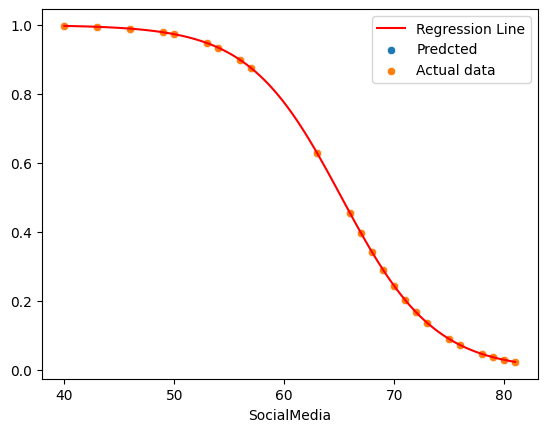

In [19]:
#Binary Logistic Regression Model
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from google.colab import files

#upload the respective file
uploaded=files.upload()
pass_df=pd.read_csv('logistic.csv')

#add x,y variable column
X= sm.add_constant(pass_df['SocialMedia'])
Y=pass_df["Pass"]

#fitting data set
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.99,
                                                  random_state=34)
pass_logit = sm.Logit(train_Y, train_X).fit()
pred_Y=pass_logit.predict(train_X)

#plotting the data set
import matplotlib.pyplot as plt
import seaborn as sns

#parameters

b0, b1= pass_logit.params

xval=np.linspace(min(pass_df['SocialMedia']), max(pass_df['SocialMedia']) , 100)
yval =1/(1+np.exp(-b0-b1*xval))

sns.lineplot(x=xval, y=yval, color='r', label="Regression Line")
sns.scatterplot(x=train_X["SocialMedia"], y=pred_Y, label="Predcted")
sns.scatterplot(x=train_X["SocialMedia"], y=pred_Y, label="Actual data")

pass_logit.summary2()

In [14]:
#Multi- Logistic Regression Model
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from google.colab import files

#upload the respective file
uploaded=files.upload()
df=pd.read_csv('index.csv')

#add x,y variable column
X_features=df.columns[1:21]
X= sm.add_constant(df[X_features])
Y=df['Creditability']

#fitting data set
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.8,
                                                  random_state=42)
logit = sm.Logit(train_Y, train_X).fit()
logit.summary2()

Saving index.csv to index (2).csv
Optimization terminated successfully.
         Current function value: 0.475002
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Method:                MLE       
Dependent Variable:       Creditability         Pseudo R-squared:      0.220     
Date:                     2023-10-15 16:42      AIC:                   802.0031  
No. Observations:         800                   BIC:                   900.3800  
Df Model:                 20                    Log-Likelihood:        -380.00   
Df Residuals:             779                   LL-Null:               -486.98   
Converged:                1.0000                LLR p-value:           1.9035e-34
No. Iterations:           7.0000                Scale:                 1.0000    
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                             -4.3171   1.1688 -3.6937 0.0002 -6.6078 -2.0263
Account Balance                    0.5486   0.0787  6.9676 0.0000  0.3943  0.7029
Duration of Credit (month)        -0.0266   0.0097 -2.7299 0.0063 -0.0457 -0.0075
Payment Status of Previous Credit  0.3681   0.0960  3.8333 0.0001  0.1799  0.5563
Purpose                            0.0180   0.0338  0.5305 0.5957 -0.0484  0.0843
Credit Amount                     -0.0001   0.0000 -2.2496 0.0245 -0.0002 -0.0000
Value Savings/Stocks               0.2970   0.0676  4.3959 0.0000  0.1646  0.4294
Length of current employment       0.1532   0.0803  1.9076 0.0564 -0.0042  0.3105
Instalment per cent               -0.3444   0.0930 -3.7045 0.0002 -0.5266 -0.1622
Sex & Marital Status               0.2651   0.1310  2.0239 0.0430  0.0084  0.5217
Guarantors                         0.2457   0.1949  1.2608 0.2074 -0.1363  0.6277
Duration in Current address        0.0405   0.0864  0.4689 0.6391 -0.1289  0.2099
Most valuable available asset     -0.1352   0.1022 -1.3221 0.1861 -0.3355  0.0652
Age (years)                        0.0095   0.0093  1.0205 0.3075 -0.0088  0.0279
Concurrent Credits                 0.2125   0.1268  1.6762 0.0937 -0.0360  0.4609
Type of apartment                  0.2906   0.1897  1.5320 0.1255 -0.0812  0.6623
No of Credits at this Bank        -0.2234   0.1773 -1.2600 0.2077 -0.5709  0.1241
Occupation                         0.0154   0.1538  0.1002 0.9202 -0.2860  0.3168
No of dependents                  -0.0932   0.2638 -0.3532 0.7240 -0.6102  0.4239
Telephone                          0.3935   0.2105  1.8697 0.0615 -0.0190  0.8060
Foreign Worker                     1.3850   0.7113  1.9473 0.0515 -0.0090  2.7791
=================================================================================

"""

In [16]:
pred_Y=logit.predict(test_X)
pred_Y_df=pd.DataFrame({
    "Actual": test_Y, "Actual Predicted": pred_Y, "Predicted": round(pred_Y)})
print(pred_Y_df)pred_Y=logit.predict(test_X)
pred_Y_df=pd.DataFrame({
    "Actual": test_Y, "Actual Predicted": pred_Y, "Predicted": round(pred_Y)})
print(pred_Y_df)

     Actual  Actual Predicted  Predicted
521       0          0.324179        0.0
737       1          0.954702        1.0
740       1          0.863055        1.0
660       1          0.924010        1.0
411       1          0.950142        1.0
..      ...               ...        ...
408       1          0.857914        1.0
332       1          0.949717        1.0
208       1          0.396120        0.0
613       1          0.390883        0.0
78        1          0.705547        1.0

[200 rows x 3 columns]


Saving index.csv to index (4).csv
Optimization terminated successfully.
         Current function value: 0.498148
         Iterations 6
Confusion matrix is: [[ 23  39]
 [ 16 122]]


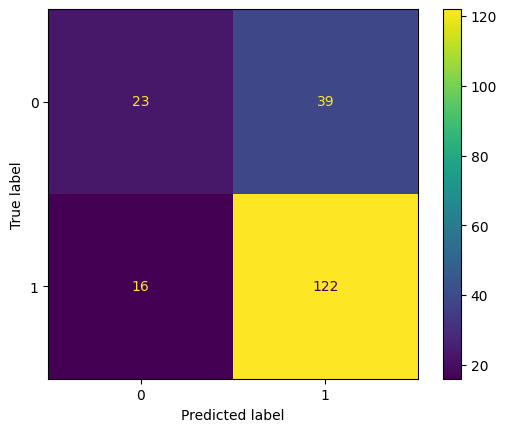

              precision    recall  f1-score   support

           0       0.59      0.37      0.46        62
           1       0.76      0.88      0.82       138

    accuracy                           0.73       200
   macro avg       0.67      0.63      0.64       200
weighted avg       0.71      0.72      0.70       200



In [18]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from google.colab import files

#upload the respective file
uploaded=files.upload()
df=pd.read_csv('index.csv')

#add x,y variable column
X_features=["Account Balance", "Duration of Credit (month)", "Payment Status of Previous Credit", "Value Savings/Stocks", "Instalment per cent"]
X= sm.add_constant(df[X_features])
Y=df['Creditability']

#fitting data set
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.8,
                                                  random_state=42)
logit = sm.Logit(train_Y, train_X).fit()
pred_Y=logit.predict(test_X)
pred_Y_df=pd.DataFrame({"Actual": test_Y,"Actual Predicted": pred_Y, "Predicted": round(pred_Y)})

#confusion matrix
conf_mat= metrics.confusion_matrix( pred_Y_df["Actual"], pred_Y_df["Predicted"])
print("Confusion matrix is:", conf_mat)

#Plotting confusion matrix
cm_disp=metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_disp.plot()
plt.show()
print(metrics.classification_report(pred_Y_df["Actual"], pred_Y_df["Predicted"]))

In [12]:
#Quiz
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from google.colab import files

#upload the respective file
uploaded=files.upload()
df=pd.read_csv('group1.csv')

#add x,y variable column
X_features=df.columns[2:9]
X= sm.add_constant(df[X_features])
Y=df['ISF']

#fitting data set
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.99,
                                                  random_state=42)
logit =sm.Logit(train_Y, train_X).fit()
logit.summary2()

Saving group1.csv to group1 (4).csv


ValueError: ignored

In [8]:
pred_Y=logit.predict(test_X)
pred_Y_df=pd.DataFrame({
    "Actual": test_Y, "Actual Predicted": pred_Y, "Predicted": round(pred_Y)})
print(pred_Y_df)

    Actual  Actual Predicted  Predicted
76       1      9.972669e-01        1.0
10       0      1.104346e-19        0.0


In [9]:
# Heat map of the HousingData
import matplotlib.pyplot as plt
import seaborn as sns

cols=df.columns[2:6]
df=df[cols].corr()

#correlation with target variable
cor_target= dict(abs(cor_df["ISF"]))
tgt= list(cor_target.keys())
val=list(cor_target.values())

cor_tgt_dict={"Target": tgt, "Value": val}
cor_tgt_df=pd.DataFrame(cor_tgt_dict)
features_df=cor_tgt_df[cor_tgt_df["Value"] > 0.5]
imp_features= list(features_df["Target"])
cor=house_df[imp_features].corr()
plt.figure(figsize=(6,6))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

NameError: ignored